In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft, ifft
from scipy.signal import find_peaks

In [3]:
def generate_ecg_data(duration, sampling_rate=250):
    def generate_ecg_pulse(duration, sampling_rate):
        t = np.linspace(0, duration, int(duration * sampling_rate), endpoint=False)
        # P wave
        p_wave = 0.15 * np.sin(2 * np.pi * 1.5 * t) * np.exp(-((t - 0.1) ** 2) / 0.005)
        # QRS complex
        qrs_complex = np.zeros_like(t)
        qrs_complex[(t > 0.2) & (t < 0.25)] = -0.3
        qrs_complex[(t > 0.25) & (t < 0.3)] = 1.0
        qrs_complex[(t > 0.3) & (t < 0.35)] = -0.2
        # T wave
        t_wave = 0.3 * np.sin(2 * np.pi * 0.75 * (t - 0.45)) * np.exp(-((t - 0.45) ** 2) / 0.015)
        # Combine all components
        pulse = p_wave + qrs_complex + t_wave
        # Add high-frequency noise to the pulse
        high_freq_noise = 0.05 * np.sin(2 * np.pi * 50 * t)
        pulse += high_freq_noise
        return pulse
 

    # Generate a single ECG pulse
    single_pulse = generate_ecg_pulse(0.8, sampling_rate)
 

    # Repeat the pulse to create a longer ECG signal
    num_pulses = int(duration / 0.8)
    ecg_data = np.tile(single_pulse, num_pulses)
 

    # Add more noise to make it more realistic
    noise = np.random.normal(0, 0.05, len(ecg_data))  # Increased noise amplitude
    ecg_data += noise
 

    # Add baseline wander
    t = np.linspace(0, duration, len(ecg_data), endpoint=False)
    baseline_wander = 0.1 * np.sin(2 * np.pi * 0.1 * t)
    ecg_data += baseline_wander
 

    # Add power line interference
    power_line_interference = 0.05 * np.sin(2 * np.pi * 60 * t)  # 60 Hz interference
    ecg_data += power_line_interference
 

    # Ensure the length of ecg_data matches the desired duration
    ecg_data = ecg_data[:int(duration * sampling_rate)]
 

    return ecg_data
 

ecg_data = generate_ecg_data(10, 250)
def generate_ecg_data(duration, sampling_rate=250):
    def generate_ecg_pulse(duration, sampling_rate):
        t = np.linspace(0, duration, int(duration * sampling_rate), endpoint=False)
        # P wave
        p_wave = 0.15 * np.sin(2 * np.pi * 1.5 * t) * np.exp(-((t - 0.1) ** 2) / 0.005)
        # QRS complex
        qrs_complex = np.zeros_like(t)
        qrs_complex[(t > 0.2) & (t < 0.25)] = -0.3
        qrs_complex[(t > 0.25) & (t < 0.3)] = 1.0
        qrs_complex[(t > 0.3) & (t < 0.35)] = -0.2
        # T wave
        t_wave = 0.3 * np.sin(2 * np.pi * 0.75 * (t - 0.45)) * np.exp(-((t - 0.45) ** 2) / 0.015)
        # Combine all components
        pulse = p_wave + qrs_complex + t_wave
        # Add high-frequency noise to the pulse
        high_freq_noise = 0.05 * np.sin(2 * np.pi * 50 * t)
        pulse += high_freq_noise
        return pulse

    # Generate a single ECG pulse
    single_pulse = generate_ecg_pulse(0.8, sampling_rate)

    # Repeat the pulse to create a longer ECG signal
    num_pulses = int(duration / 0.8)
    ecg_data = np.tile(single_pulse, num_pulses)

    # Add more noise to make it more realistic
    noise = np.random.normal(0, 0.05, len(ecg_data))  # Increased noise amplitude
    ecg_data += noise

    # Add baseline wander
    t = np.linspace(0, duration, len(ecg_data), endpoint=False)
    baseline_wander = 0.1 * np.sin(2 * np.pi * 0.1 * t)
    ecg_data += baseline_wander

    # Add power line interference
    power_line_interference = 0.05 * np.sin(2 * np.pi * 60 * t)  # 60 Hz interference
    ecg_data += power_line_interference

    # Ensure the length of ecg_data matches the desired duration
    ecg_data = ecg_data[:int(duration * sampling_rate)]

    return ecg_data

ecg_data = generate_ecg_data(10, 250)

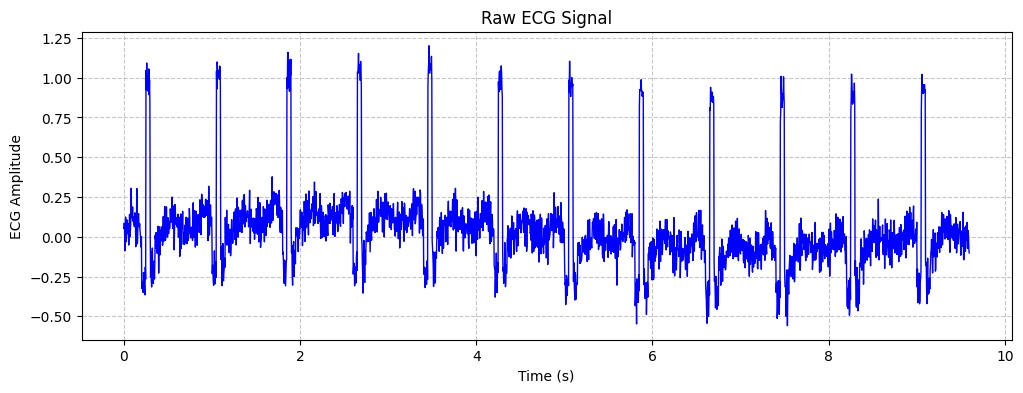

In [8]:
#Part 1
# Generate time array
sampling_rate = 250
time = np.arange(len(ecg_data)) / sampling_rate

# Create the plot
plt.figure(figsize=(12, 4))
plt.plot(time, ecg_data, 'b-', linewidth=1)

# Add labels and title
plt.xlabel('Time (s)')
plt.ylabel('ECG Amplitude')
plt.title('Raw ECG Signal')

# Add grid
plt.grid(True, linestyle='--', alpha=0.7)

# Show the plot
plt.show()

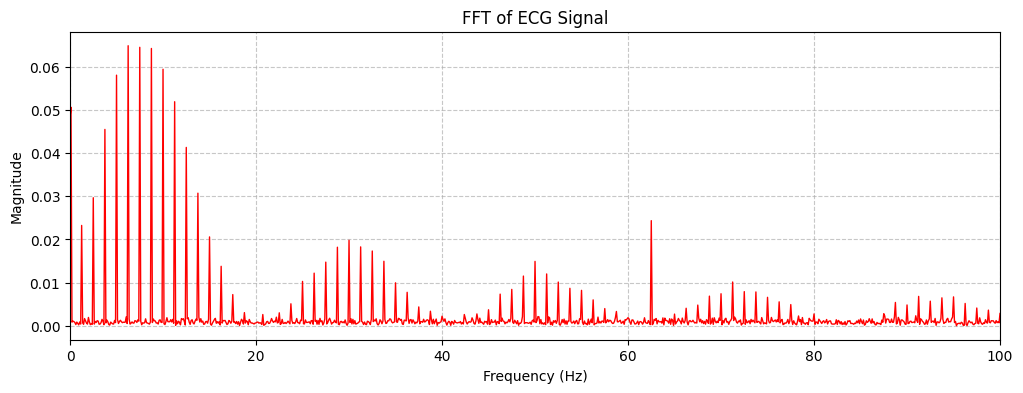

In [5]:
#Part 2: Fourier Transform
# Compute FFT of the ECG signal
fft_result = fft(ecg_data)
n = len(ecg_data)
freq = np.fft.fftfreq(n, d=1/sampling_rate)

# Get positive frequencies and corresponding magnitudes
positive_freq_mask = freq >= 0
freq_pos = freq[positive_freq_mask]
fft_magnitude = np.abs(fft_result[positive_freq_mask])

# Normalize the magnitude
fft_magnitude = fft_magnitude / n

# Create the plot
plt.figure(figsize=(12, 4))
plt.plot(freq_pos, fft_magnitude, 'r-', linewidth=1)

# Add labels and title
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('FFT of ECG Signal')

# Add grid
plt.grid(True, linestyle='--', alpha=0.7)

# Limit x-axis to show relevant frequencies (up to 100 Hz)
plt.xlim(0, 100)

# Show the plot
plt.show()


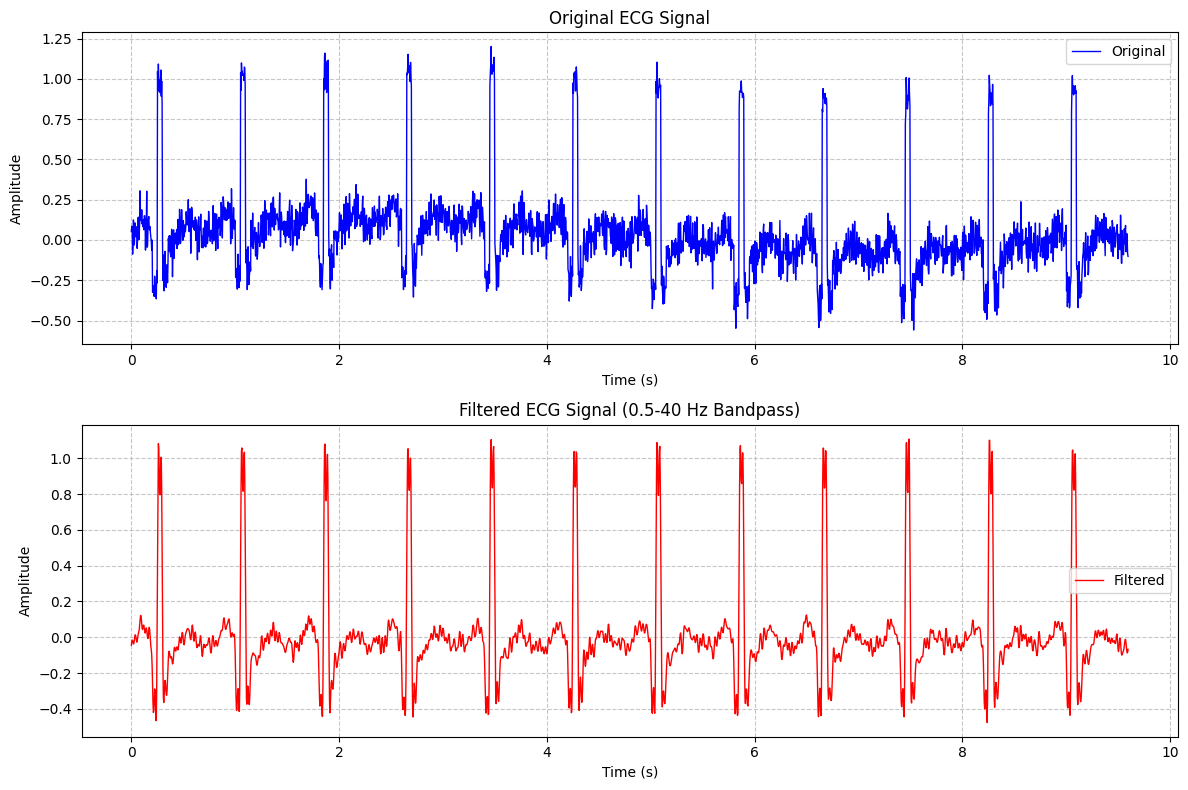

In [6]:
#Part 3:
# Compute FFT of the ECG signal
fft_result = fft(ecg_data)
n = len(ecg_data)
freq = np.fft.fftfreq(n, d=1/sampling_rate)

# Create bandpass filter mask (0.5 Hz to 40 Hz)
low_cutoff = 0.5
high_cutoff = 40
bandpass_mask = (np.abs(freq) >= low_cutoff) & (np.abs(freq) <= high_cutoff)

# Apply filter in frequency domain
fft_filtered = fft_result * bandpass_mask

# Reconstruct filtered signal using inverse FFT
ecg_filtered = np.real(ifft(fft_filtered))

# Plot original vs filtered signals
plt.figure(figsize=(12, 8))

# Original signal
plt.subplot(2, 1, 1)
plt.plot(time, ecg_data, 'b-', label='Original', linewidth=1)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Original ECG Signal')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()

# Filtered signal
plt.subplot(2, 1, 2)
plt.plot(time, ecg_filtered, 'r-', label='Filtered', linewidth=1)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Filtered ECG Signal (0.5-40 Hz Bandpass)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()

plt.tight_layout()
plt.show()

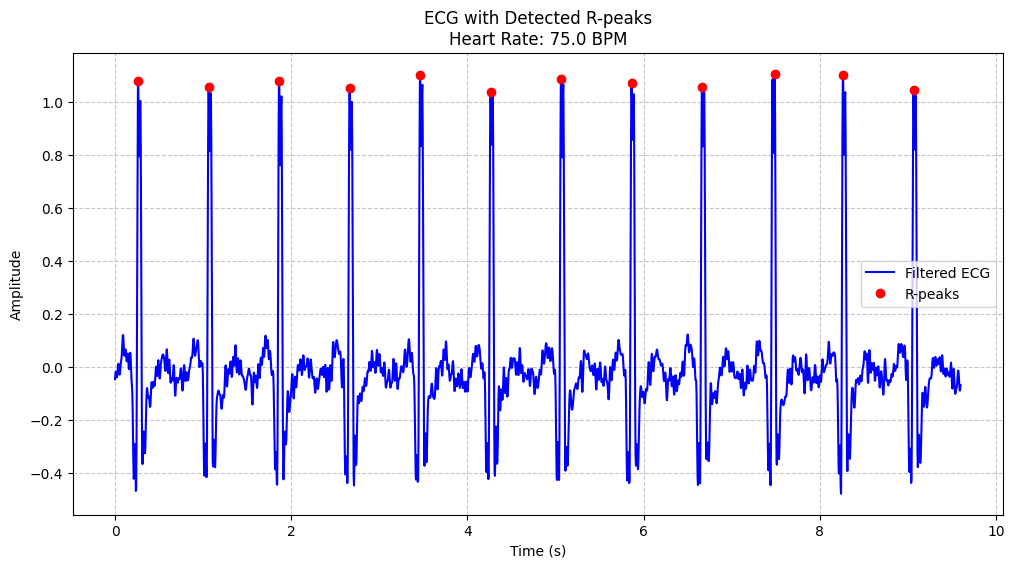

Number of R-peaks detected: 12
Average R-R interval: 0.800 seconds
Heart Rate: 75.0 BPM


In [7]:
#Part 4: Heat Rate Calculation
# Find R-peaks in the filtered signal
# The height parameter should be set to detect prominent R peaks
peaks, _ = find_peaks(ecg_filtered, height=0.5, distance=100)

# Calculate time points of the peaks
peak_times = time[peaks]

# Calculate intervals between peaks (in seconds)
intervals = np.diff(peak_times)

# Calculate heart rate (beats per minute)
heart_rate = 60 / np.mean(intervals)

# Plot the filtered signal with detected peaks
plt.figure(figsize=(12, 6))
plt.plot(time, ecg_filtered, 'b-', label='Filtered ECG')
plt.plot(peak_times, ecg_filtered[peaks], 'ro', label='R-peaks')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title(f'ECG with Detected R-peaks\nHeart Rate: {heart_rate:.1f} BPM')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.show()

# Print detailed results
print(f"Number of R-peaks detected: {len(peaks)}")
print(f"Average R-R interval: {np.mean(intervals):.3f} seconds")
print(f"Heart Rate: {heart_rate:.1f} BPM")